In [437]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [438]:
import joblib
import matplotlib.pyplot as plt
from glob import glob
import numpy as np
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import ShuffleSplit
import pandas as pd 
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [439]:
age_list = joblib.load("liste_ages.gz")
age_list = np.array(age_list)

In [440]:
index = np.argsort(age_list)

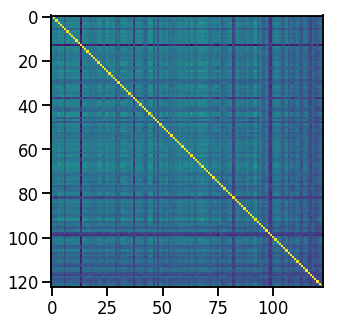

In [510]:
for dist_path in glob("data/distance_matrix*"):
    dist_mat = joblib.load(dist_path)
    dist_mat = dist_mat[index, :][:, index]
    plt.figure(figsize=(5, 5))
    plt.imshow(dist_mat)
    plt.savefig(dist_(&path)

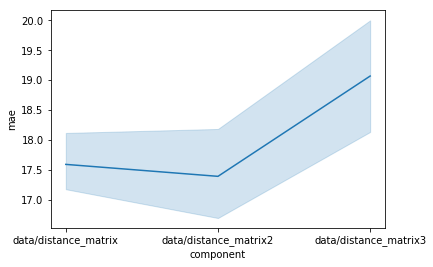

In [442]:
results = []
for dist_path in glob("data/distance_matrix*"):
    dist_mat = joblib.load(dist_path)
    (shuffle = ShuffleSplit(n_splits=5, train_size=0.8, test_size=0.2))
    for train, test in shuffle.split(dist_mat[0]):
        X_train = dist_mat[train, :]
        Y_train = age_list[train]
        X_test = dist_mat[test, :]
        Y_train_pred = np.mean(age_list[train])
        Y_test_pred = np.mean(age_list[train])
        Y_test = age_list[test]
        results.append([dist_path, train, np.mean(np.abs(Y_test_pred - Y_test))])
results = pd.DataFrame(results, columns=["component", "train", "mae"])
sns.lineplot(x="component", y="mae", data=results)

In [443]:
class DummyRegressor:
    def __init__(self):
        self.p = 0
    def fit(self, X, Y):
        self.p = np.mean(Y)
        return self
    def predict(self, X):
        return self.p

/home/hugo/Research/hugo-richard-M2/retreat/venv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


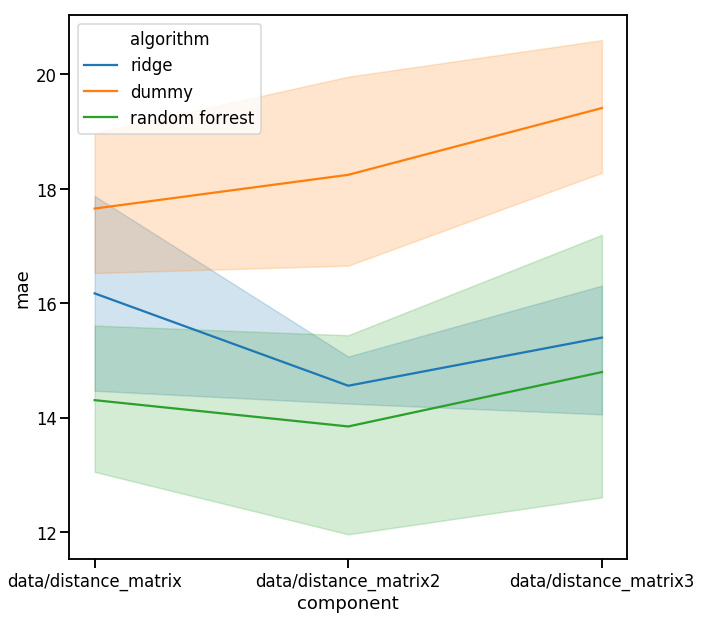

In [500]:
results = []
for name_algo in [
    ("ridge", RidgeCV(alphas=tuple(10**k for k in range(10)))),
    ("dummy", DummyRegressor()),
    ("random forrest", RandomForestRegressor())
]:
    name, algo = name_algo
    for dist_path in glob("data/distance_matrix*"):
        dist_mat = joblib.load(dist_path)
        shuffle = ShuffleSplit(n_splits=5, train_size=0.8, test_size=0.2)
        for train, test in shuffle.split(dist_mat[0]):
            X_train = dist_mat[:, train][train, :]
            Y_train = age_list[train]
            X_test = dist_mat[:, train][test, :]
            algo.fit(X_train, Y_train)
            Y_train_pred = algo.predict(X_train)
            Y_test_pred = algo.predict(X_test)
            Y_test = age_list[test]
            results.append([dist_path, train, np.mean(np.abs(Y_test_pred - Y_test)), name])
sns.set_context("talk")
plt.figure(figsize=(10, 10))
results = pd.DataFrame(results, columns=["component", "train", "mae", "algorithm"])
sns.lineplot(x="component", y="mae", data=results, hue="algorithm")
plt.savefig("./MAE_pred.png")

In [505]:
results = []
for name_algo in [
    ("ridge", RidgeCV(alphas=tuple(10**k for k in range(10)))),
    ("dummy", DummyRegressor()),
    ("random forrest", RandomForestRegressor())
]:
    name, algo = name_algo
    dist_mats = np.column_stack([joblib.load(dist_path) for dist_path in glob("data/distance_matrix*")])
    print(dist_mats.shape)
    shuffle = ShuffleSplit(n_splits=5, train_size=0.8, test_size=0.2)
    for train, test in shuffle.split(dist_mats[:, 0]):
        X_train = dist_mats[:, np.concatenate([train, 123 + train, 123 * 2 + train])][train, :]
        Y_train = age_list[train]
        X_test = dist_mats[:, np.concatenate([train, 123 + train, 123 * 2 + train])][test, :]
        algo.fit(X_train, Y_train)
        Y_train_pred = algo.predict(X_train)
        Y_test_pred = algo.predict(X_test)
        Y_test = age_list[test]
        results.append([dist_path, train, np.mean(np.abs(Y_test_pred - Y_test)), name])
sns.set_context("talk")
plt.figure(figsize=(10, 10))
results = pd.DataFrame(results, columns=["component", "train", "mae", "algorithm"])
sns.boxplot(x="algorithm", y="mae", data=results, hue="algorithm")
plt.savefig("./MAE_pred.png")

(123, 369)
(123, 369)
(123, 369)


/home/hugo/Research/hugo-richard-M2/retreat/venv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [456]:
class DummyClassifier:
    def __init__(self):
        self.p = 0
    def fit(self, X, Y):
        return self
    def predict(self, X):
        return np.random.randint(2)

/home/hugo/Research/hugo-richard-M2/retreat/venv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


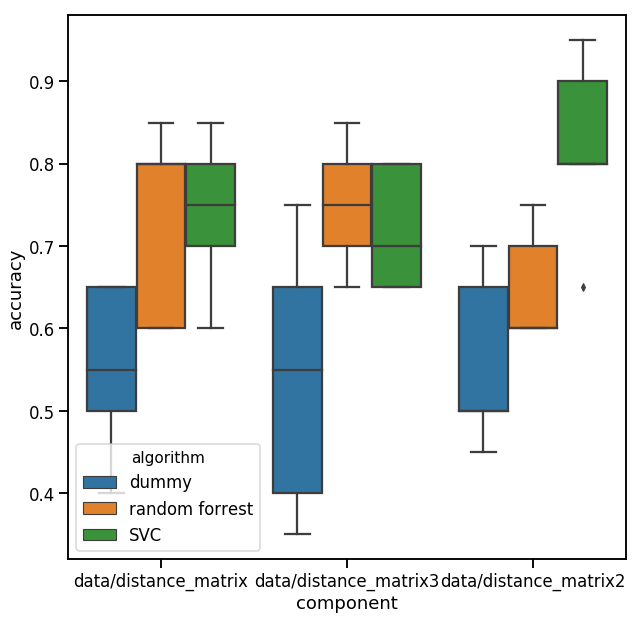

In [486]:
results = []
for name_algo in [
    ("dummy", DummyClassifier()),
    ("random forrest", RandomForestClassifier()),
    ("SVC", GridSearchCV(SVC(kernel='linear'), {'C': tuple(10**k for k in range(5))}, cv=5, iid=True))
]:
    for dist_path in glob("data/distance_matrix*"):
        dist_mat = joblib.load(dist_path)
        name, algo = name_algo
        useful_ages = (age_list < 30) | (age_list > 50)
        useful_age_list = age_list[useful_ages]
        dist_mat = dist_mat[useful_ages, :][:, useful_ages]
        Y = useful_age_list
        Y[useful_age_list < 30] = 1
        Y[useful_age_list > 50] = 0
        shuffle = ShuffleSplit(n_splits=5, train_size=0.8, test_size=0.2)
        for train, test in shuffle.split(dist_mat[:, 0]):
            X_train = dist_mat[:, train][train, :]
            X_test = dist_mat[:, train][test, :]
            Y_train = Y[train]
            algo.fit(X_train, Y_train)
            Y_train_pred = algo.predict(X_train)
            Y_test_pred = algo.predict(X_test)
            Y_test = Y[test]
            results.append([dist_path, train, np.mean(Y_test == Y_test_pred), name])
sns.set_context("talk")
plt.figure(figsize=(10, 10))
results = pd.DataFrame(results, columns=["component", "train", "accuracy", "algorithm"])
sns.boxplot(x="component", y="accuracy", data=results, hue="algorithm")

In [504]:
min_age = 30
max_age = 52

results = []
for name_algo in [
    ("dummy", DummyClassifier()),
    ("random forrest", RandomForestClassifier()),
    ("SVC", GridSearchCV(SVC(kernel='linear'), {'C': tuple(10**k for k in range(5))}, cv=5, iid=True))
]:
    dist_mats = np.column_stack([joblib.load(dist_path) for dist_path in glob("data/distance_matrix*")])
    name, algo = name_algo
    useful_ages = (age_list < min_age) | (age_list > max_age)
    useful_age_list = age_list[useful_ages]
    dist_mats = dist_mats[useful_ages, :][:, np.concatenate([useful_ages, useful_ages, useful_ages])]
    Y = useful_age_list
    Y[useful_age_list < min_age] = 1
    Y[useful_age_list > max_age] = 0
    nn = len(useful_age_list)
    shuffle = ShuffleSplit(n_splits=5, train_size=0.8, test_size=0.2)
    for train, test in shuffle.split(dist_mats[:, 0]):
        X_train = dist_mats[:, np.concatenate([train, nn + train, nn * 2 + train])][train, :]
        X_test = dist_mats[:, np.concatenate([train, nn + train, nn * 2 + train])][test, :]
        Y_train = Y[train]
        algo.fit(X_train, Y_train)
        Y_train_pred = algo.predict(X_train)
        Y_test_pred = algo.predict(X_test)
        Y_test = Y[test]
        results.append([dist_path, train, np.mean(Y_test == Y_test_pred), name])
sns.set_context("talk")
plt.figure(figsize=(10, 10))
results = pd.DataFrame(results, columns=["component", "train", "accuracy", "algorithm"])
sns.boxplot(x="algorithm", y="accuracy", data=results, hue="algorithm")
plt.savefig("./classif.png")

/home/hugo/Research/hugo-richard-M2/retreat/venv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


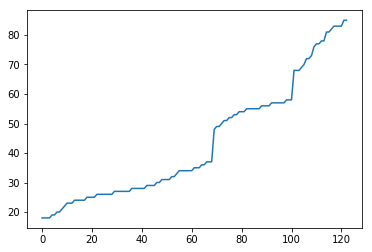

In [399]:
plt.plot(np.sort(age_list))

In [465]:
np.sum(age_list < 30)

46

In [464]:
np.sum(age_list > 52)

46

In [ ]:
results = []
for name_algo in [
    ("ridge", RidgeCV(alphas=tuple(10**k for k in range(10)))),
    ("dummy", DummyRegressor()),
    ("random forrest", RandomForestRegressor())
]:
    name, algo = name_algo
    dist_mats = joblib.load("distance_matrix")
    print(dist_mats.shape)
    shuffle = ShuffleSplit(n_splits=5, train_size=0.8, test_size=0.2)
    for train, test in shuffle.split(dist_mats[:, 0]):
        X_train = dist_mats[:, train, :][:, :, train].flatten()
        Y_train = age_list[train]
        X_test = dist_mats[:, test, :][:, :, test].flatten()
        algo.fit(X_train, Y_train)
        Y_train_pred = algo.predict(X_train)
        Y_test_pred = algo.predict(X_test)
        Y_test = age_list[test]
        results.append([dist_path, train, np.mean(np.abs(Y_test_pred - Y_test)), name])
sns.set_context("talk")
plt.figure(figsize=(10, 10))
results = pd.DataFrame(results, columns=["component", "train", "mae", "algorithm"])
sns.boxplot(x="algorithm", y="mae", data=results, hue="algorithm")
plt.savefig("./Big_MAE_pred.png")